In this assignment students need to predict whether a person makes over 50K per year
or not from classic adult dataset using XGBoost. The description of the dataset is as
follows:

Data Set Information:
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions: ((AAGE>16) &&
(AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes:
>50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,
Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc,
9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed,
Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial,
Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing,
Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany,
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras,
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,
Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong,
Holand-Netherlands.

In [4]:
import numpy as np
import pandas as pd


In [6]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set =pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [8]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [9]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [12]:
# created a column in train and test set train_id and test_id respectively.
train_set['train_ind'] = 1
test_set['train_ind'] = 0

In [13]:

#combined data 
combined_data = train_set.append(test_set)

In [14]:
# combined data shape
combined_data.shape

(48842, 16)

In [25]:
# Columns of the dataset
combined_data.describe(include = ['O']).columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'wage_class'],
      dtype='object')

In [27]:
df1 = combined_data.replace(' ?', np.nan)

# columns and number of nulls in that columns
df1.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
train_ind            0
dtype: int64

In [28]:
# Filling NaN with ' unknown'
df1.fillna(' unknown', inplace = True)

In [29]:
df1.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
train_ind         0
dtype: int64

In [30]:
df1['wage_class'].unique()


array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [32]:
df1['target_variable'] = 0

In [33]:
df1.loc[df1['wage_class'] == ' >50K' ,'target_variable'] = 1
df1.loc[df1['wage_class'] == ' >50K.' ,'target_variable'] = 1


In [35]:
df1['target_variable'].value_counts()

0    37155
1    11687
Name: target_variable, dtype: int64

In [36]:
df1.shape

(48842, 17)

In [37]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,train_ind,target_variable
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,0


In [39]:
df1['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [40]:
dummies = pd.get_dummies(df1['relationship'], prefix = 'relationship') # this command will create as many columns as many categories

In [42]:
df1 = pd.concat([df1,dummies],axis = 1)

In [43]:
df1.drop('relationship', axis = 1, inplace = True) # since we are adding dummies

In [44]:
dummies_workclass = pd.get_dummies(df1['workclass'], prefix = 'workclass')
dummies_education = pd.get_dummies(df1['education'], prefix = 'education')
dummies_marital_status = pd.get_dummies(df1['marital_status'], prefix = 'marital_status')
dummies_occupation = pd.get_dummies(df1['occupation'], prefix = 'occupation')
dummies_race = pd.get_dummies(df1['race'], prefix = 'race')
dummies_sex = pd.get_dummies(df1['sex'], prefix = 'sex')

df1 = pd.concat([df1,dummies_workclass,dummies_education,
                 dummies_marital_status,dummies_occupation,dummies_race,dummies_sex],axis = 1)

In [45]:
# since dummies are added dropping the actual column
df1.drop(['workclass', 'education', 'marital_status', 'occupation', 'race', 'sex',
          'wage_class'], axis = 1, inplace = True)

In [46]:
df1['country']= 0
df1.loc[df1['native_country'] == ' United-States' ,'country'] = 1
df1['country'].value_counts()

1    43832
0     5010
Name: country, dtype: int64

In [47]:
df1.drop('native_country', axis = 1, inplace = True)

In [48]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [49]:
final_train_set = df1[df1["train_ind"] == 1]

In [50]:
final_test_set = df1[df1["train_ind"] == 0]

In [51]:
y = final_train_set.pop('target_variable')

In [52]:
X = final_train_set

In [54]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target_variable, dtype: int64

In [55]:
X.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,train_ind,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,occupation_ Transport-moving,occupation_ unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,country
0,39,77516,13,2174,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1,50,83311,13,0,0,13,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
2,38,215646,9,0,0,40,1,0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,53,234721,7,0,0,40,1,1,0,0,...,0,0,0,0,1,0,0,0,1,1
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [56]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [57]:

# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [58]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [59]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1520
Accuracy: 0.84


In [60]:
#Import Xgboost
import xgboost as xgb

In [61]:
# to feed data to xgboost first training set is transformed into Dmatrix. in code below train and test sets are transformed.

xgtrain = xgb.DMatrix(X_train, label = y_train)
xgtest = xgb.DMatrix(X_test, label = y_test)

In [62]:
# to see out output 
watchlist = [(xgtrain,'train'),(xgtest, 'eval')]

In [63]:
# parameters

params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'auc'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [64]:
#Running the model with 150 iterations and parameters defined above

num_rounds = 150
model_cv = xgb.train(plst, xgtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-auc:0.902622	eval-auc:0.897741
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.913127	eval-auc:0.907802
[2]	train-auc:0.916349	eval-auc:0.91003
[3]	train-auc:0.917222	eval-auc:0.91147
[4]	train-auc:0.917998	eval-auc:0.911643
[5]	train-auc:0.918249	eval-auc:0.911979
[6]	train-auc:0.919218	eval-auc:0.91218
[7]	train-auc:0.920128	eval-auc:0.912991
[8]	train-auc:0.920857	eval-auc:0.91362
[9]	train-auc:0.921984	eval-auc:0.914644
[10]	train-auc:0.922693	eval-auc:0.914891
[11]	train-auc:0.923443	eval-auc:0.91527
[12]	train-auc:0.924088	eval-auc:0.915634
[13]	train-auc:0.924983	eval-auc:0.916441
[14]	train-auc:0.92565	eval-auc:0.916831
[15]	train-auc:0.926134	eval-auc:0.916986
[16]	train-auc:0.926803	eval-auc:0.917402
[17]	train-auc:0.927172	eval-auc:0.917505
[18]	train-auc:0.927963	eval-auc:0.917812
[19]	train-auc:0.928399	eval-auc:0.917952
[20]	train-auc:0.928794	eval-auc:0.

In [65]:
### Clearly training AUC is 95% and validation AUC is 92%. Model does very well on unseen data as well.

In [66]:
feat_imp = pd.Series(model_cv.get_fscore()).sort_values(ascending=False)

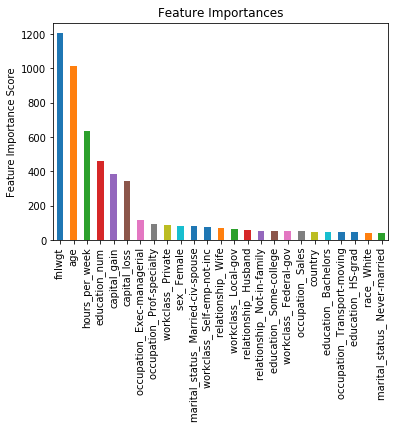

In [67]:
import matplotlib.pyplot as plt
feat_imp[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()